In [1]:
import numpy as np
from mewralNet import MewralNet
from backpropagation import Backpropagation
import matplotlib.pyplot as plt

Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in layer 1
Trying to nudge weights in layer1
Reached Base Case, Backpropagating....
Backpropagation completeted in 

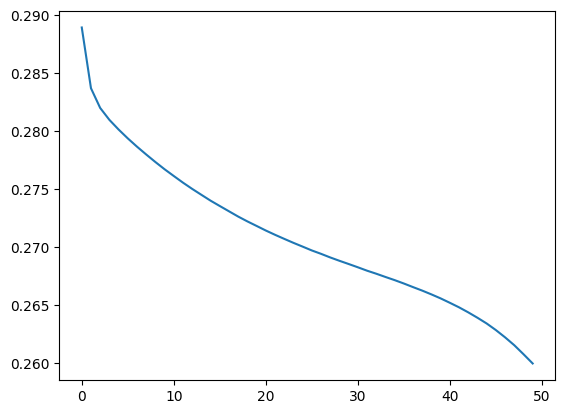

50


In [2]:
import numpy as np

input_data = np.array([
    [1, 0],
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1]
])
output_data = np.array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1])


layer_dims = [input_data.shape[1], 3, len(np.unique(output_data))]

back = Backpropagation(layer_dims=layer_dims, learning_rate=0.5)

back.backpropagate(input_data, output_data, epocs=50)

index  = range(len(back.loss_per_epoch))
plt.plot(index, back.loss_per_epoch)
plt.show()
print(len(back.loss_per_epoch))


In [3]:
print(back.predict([1,0]))


[0.537  0.4306]


# RNN Implementation Test

In [4]:
from RNN import RecurrentMewralNet
import numpy as np
import matplotlib.pyplot as plt

# --- Your Existing Setup ---
print("Generating Data...")
steps = np.linspace(0, 10, 50)
data = np.sin(steps)

# Shape data into (Sequence_Length, Input_Size)
inputs = data[:-1].reshape(-1, 1) 
targets = data[1:].reshape(-1, 1) 

print(f"Input Shape: {inputs.shape}")
print(f"Target Shape: {targets.shape}")



Generating Data...
Input Shape: (49, 1)
Target Shape: (49, 1)



Starting Training...
Epoch 0: Loss = 11.772780
Epoch 200: Loss = 0.251981
Epoch 400: Loss = 0.097351
Epoch 600: Loss = 0.000759
Epoch 800: Loss = 0.000477

Training Complete! Generating Graphs...


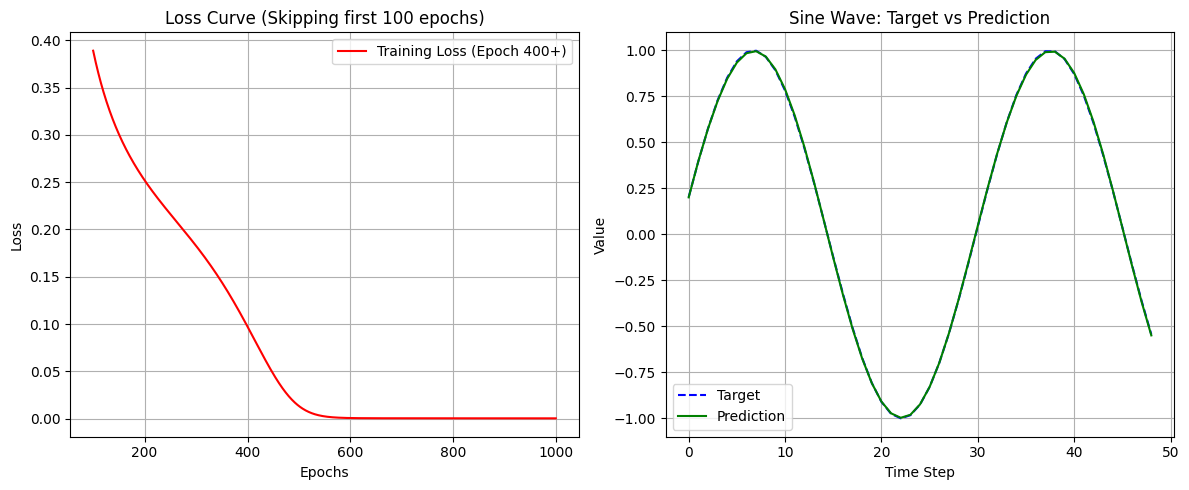

In [5]:
rnn = RecurrentMewralNet(input_size=1, hidden_size=20, output_size=1)
print("\nStarting Training...")
epochs = 1000
loss_history = [] 

for i in range(epochs):
    loss = rnn.BPTT(inputs, targets, learning_rate=0.01)
    loss_history.append(loss)
    
    if i % 200 == 0:
        print(f"Epoch {i}: Loss = {loss:.6f}")

print("\nTraining Complete! Generating Graphs...")
predictions, _ = rnn.forward(inputs)

plt.figure(figsize=(12, 5))

# Plot 1: Loss over Time (CLIPPED)
plt.subplot(1, 2, 1)

start_epoch = 100
clipped_loss = loss_history[start_epoch:]

epoch_range = range(start_epoch, epochs)

plt.plot(epoch_range, clipped_loss, label='Training Loss (Epoch 400+)', color='red')
plt.title(f'Loss Curve (Skipping first {start_epoch} epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot 2: Actual vs Predicted (Same as before)
plt.subplot(1, 2, 2)
plt.plot(targets.flatten(), label='Target', color='blue', linestyle='dashed')
plt.plot(np.array(predictions).flatten(), label='Prediction', color='green')
plt.title('Sine Wave: Target vs Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Sin Wave Blindfold Test


--- Starting Blindfold Generation ---


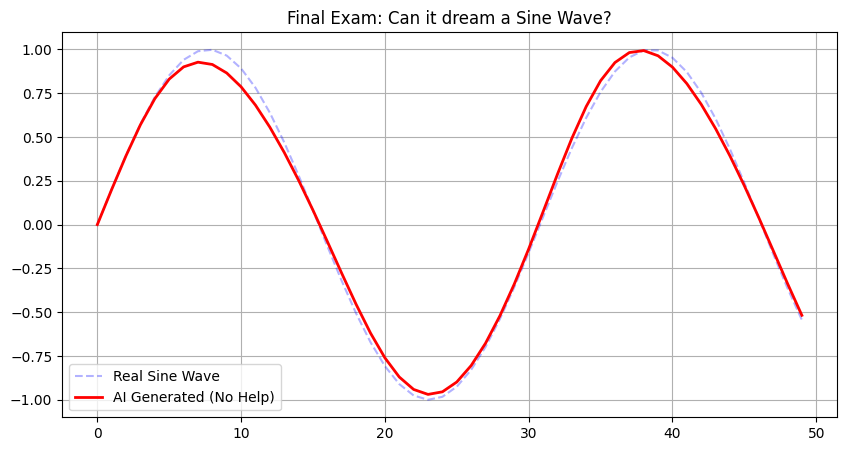

In [6]:
# This test was generated by Gemini(AI)!
import matplotlib.pyplot as plt

# --- BLINDFOLD TEST (The Final Exam) ---
print("\n--- Starting Blindfold Generation ---")

# 1. Start with the very first point (Index 0)
current_input = inputs[0].reshape(1, 1)
generated_sequence = [current_input.item()] 

# 2. Reset Memory
# We pass None so the forward method creates a fresh zero-state
last_hidden_state = None 

# 3. Generate 50 steps purely from its own imagination
for _ in range(49):
    prediction, hidden_dict = rnn.forward(current_input, hidden_state=last_hidden_state)
    
    # Extract result
    next_value = prediction[-1].item()
    generated_sequence.append(next_value)
    
    # Update memory for next step
    # Since we fed 1 input, the new state is at index 0
    last_hidden_state = hidden_dict[0] 
    
    # Update input
    current_input = np.array([[next_value]])

# 4. Plot
plt.figure(figsize=(10, 5))
plt.plot(data, label='Real Sine Wave', color='blue', linestyle='dashed', alpha=0.3)
plt.plot(generated_sequence, label='AI Generated (No Help)', color='red', linewidth=2)
plt.title('Final Exam: Can it dream a Sine Wave?')
plt.legend()
plt.grid(True)
plt.show()

### Dual Wave Test

Generating Complex Wave...
Training on Dual Wave (This takes a moment)...
Epoch 0: Loss = 52.51928
Epoch 2000: Loss = 0.02599
Epoch 4000: Loss = 0.01353
Epoch 6000: Loss = 0.00511

Taking the Exam...


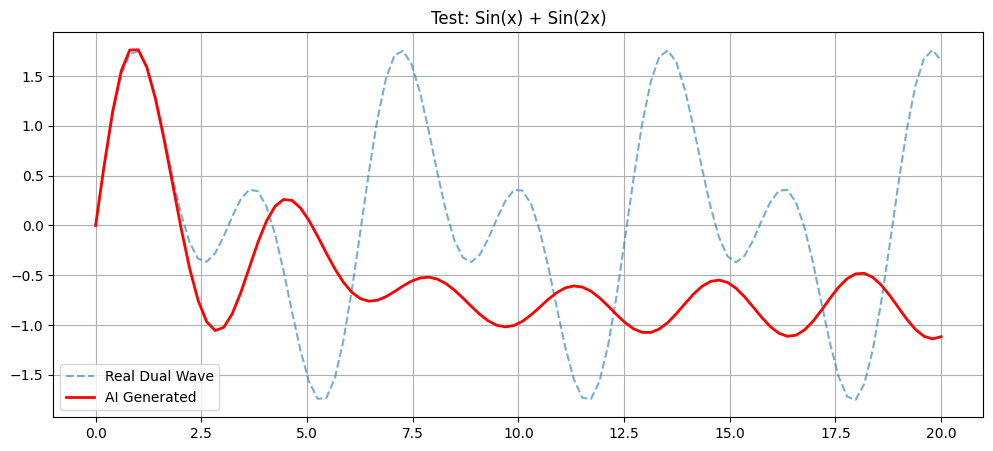

In [7]:
# This test was generated by Gemini(AI)!
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Generate The "Dual Wave" Data ---
print("Generating Complex Wave...")
# We need more data points to see the pattern repeat
steps = np.linspace(0, 20, 100) 
data = np.sin(steps) + np.sin(2 * steps) # <--- THE COMPLEX FUNCTION

inputs = data[:-1].reshape(-1, 1)
targets = data[1:].reshape(-1, 1)

# --- 2. Initialize & Train ---
# We bump hidden_size to 32 because the pattern is harder to memorize
rnn = RecurrentMewralNet(input_size=1, hidden_size=32, output_size=1)

print("Training on Dual Wave (This takes a moment)...")
# We also need more epochs to learn the finer details
for i in range(8000):
    loss = rnn.BPTT(inputs, targets, learning_rate=0.005) # Lower LR for stability
    if i % 2000 == 0:
        print(f"Epoch {i}: Loss = {loss:.5f}")

# --- 3. The Blindfold Test ---
print("\nTaking the Exam...")
curr_input = inputs[0].reshape(1, 1)
last_h = None
gen_seq = [curr_input.item()]

# Generate 99 steps (to match the length of our data)
for _ in range(99):
    pred_list, h_dict = rnn.forward(curr_input, hidden_state=last_h)
    last_h = h_dict[0]
    next_val = pred_list[-1].item()
    gen_seq.append(next_val)
    curr_input = np.array([[next_val]])

# --- 4. Plot Results ---
plt.figure(figsize=(12, 5))
plt.plot(steps, data, label='Real Dual Wave', linestyle='--', alpha=0.6)
plt.plot(steps, gen_seq, label='AI Generated', color='red', linewidth=2)
plt.title('Test: Sin(x) + Sin(2x)')
plt.legend()
plt.grid(True)
plt.show()